In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
ROOT_PATH = './'

In [3]:
event_space_dataset_dir = ROOT_PATH + 'Dataset/event_space_data/'
# 处理后的各个用户的df列表，后续需要拼接成一个csv
user_sorted_df = []

In [4]:
# 第i个受试者
# 如果没有这个文件，就跳过这一轮
pass_epoch = False
for uid in range(2, 63):
    user_data = []
    # 第i次游玩
    for i in range(3):
        try:
            user_data.append(pd.read_csv(event_space_dataset_dir + str(uid) + '-' + str(i + 1) + '.csv'))
            user_data[i].drop('l_space_min', axis=1, inplace=True)
            user_data[i].drop('l_space_mean', axis=1, inplace=True)
            user_data[i].drop('r_space_min', axis=1, inplace=True)
            user_data[i].drop('r_space_mean', axis=1, inplace=True)
        except:
            pass_epoch = True
            # print('no such file: ' + str(uid) + '-' + str(i + 1) + '.csv')
    if pass_epoch:
        pass_epoch = False
        continue
    # 缺省值处理
    for i in range(3):
        df = user_data[i]
        print('第' + str(i + 1) + '次')
        # 填充缺省值
        for j in range(1, 5):
            print('事件' + str(j) + '的各列平均值：')
            print(df[df['event'] == j].median())
            # 使用相同event下的平均值来填充对应列的缺省值
            # 疑问：用平均值填充还是用最大值填充呢？
            df[df['event'] == j] = df[df['event'] == j].fillna(df[df['event'] == j].median())

    # 3次求平均值
    merge_dataset = (user_data[0] + user_data[1] + user_data[2]) / 3

    event_data = merge_dataset[merge_dataset['event'] == 1].median()
    df = pd.DataFrame({
        'event': event_data['event'],
        'l_space_max': event_data['l_space_max'],
        'r_space_max': event_data['r_space_max']
    }, index=[0])
    for i in range(2, 5):
        ds = merge_dataset[merge_dataset['event'] == i].median()
        df = df.append(ds, ignore_index=True)
    # event列转格式
    df['event'] = df['event'].astype(int)
    # 左右手取最大值(先只取右手代替)
    df = df.drop('l_space_max', axis=1)
    # 替换列名
    df = df.rename(columns={'r_space_max':'avg_max'})
    # 插入用户编号
    USER_ID = uid
    df.insert(0, 'uid', USER_ID)
    # 插入总表
    user_sorted_df.append(df)

第1次
事件1的各列平均值：
event          1.000000
l_space_max    0.488262
r_space_max    0.532635
dtype: float64
事件2的各列平均值：
event          2.000000
l_space_max    0.494975
r_space_max    0.522015
dtype: float64
事件3的各列平均值：
event          3.000000
l_space_max    0.507419
r_space_max    0.486463
dtype: float64
事件4的各列平均值：
event          4.000000
l_space_max    0.567880
r_space_max    0.493746
dtype: float64
第2次
事件1的各列平均值：
event          1.000000
l_space_max    0.488262
r_space_max    0.518652
dtype: float64
事件2的各列平均值：
event          2.000000
l_space_max    0.471699
r_space_max    0.532259
dtype: float64
事件3的各列平均值：
event          3.000000
l_space_max    0.441539
r_space_max    0.531867
dtype: float64
事件4的各列平均值：
event          4.000000
l_space_max    0.573846
r_space_max    0.515186
dtype: float64
第3次
事件1的各列平均值：
event          1.000000
l_space_max    0.475079
r_space_max    0.544059
dtype: float64
事件2的各列平均值：
event          2.000000
l_space_max    0.460977
r_space_max    0.526308
dtype: float64
事件3的各列平均

C:\Users\Shadow006\AppData\Local\Temp\ipykernel_31596\2299222222.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(ds, ignore_index=True)
C:\Users\Shadow006\AppData\Local\Temp\ipykernel_31596\2299222222.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(ds, ignore_index=True)
C:\Users\Shadow006\AppData\Local\Temp\ipykernel_31596\2299222222.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(ds, ignore_index=True)
C:\Users\Shadow006\AppData\Local\Temp\ipykernel_31596\2299222222.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(ds, ignore_index=True)
C:\Users\Shadow006\A

In [5]:
# 验证是否插入成功
len(user_sorted_df)

59

In [6]:
output_df = user_sorted_df[0]
for i in range(1, len(user_sorted_df)):
    output_df = output_df.append(user_sorted_df[i], ignore_index=True)
output_df

C:\Users\Shadow006\AppData\Local\Temp\ipykernel_31596\1704172682.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(user_sorted_df[i], ignore_index=True)


,uid,event,avg_max
0,3,1,0.530834
1,3,2,0.526511
2,3,3,0.500393
3,3,4,0.511583
4,4,1,0.480312
...,...,...,...
231,61,4,0.513483
232,62,1,0.501653
233,62,2,0.461437
234,62,3,0.467867


In [7]:
# 保存数据集
PATH = './Dataset/czm_sorted_data/'
output_df.to_csv(PATH + 'user_scale_by_event.csv', index=False)

In [8]:
# 以事件为分组进行csv的存储
event_df_list = []
for i in range(4):
    event_df = output_df[output_df['event'] == i + 1]
    event_df_list.append(event_df)
    event_df.to_csv(PATH + 'user_scale_by_event_' + str(i + 1) + '.csv', index=False)

In [9]:
event_df_list

[     uid  event   avg_max
 0      3      1  0.530834
 4      4      1  0.480312
 8      5      1  0.565333
 12     7      1  0.478278
 16     8      1  0.359157
 20     9      1  0.422268
 24    10      1  0.459557
 28    11      1  0.407063
 32    12      1  0.490426
 36    13      1  0.534859
 40    14      1  0.389308
 44    15      1  0.439177
 48    16      1  0.428752
 52    17      1  0.401254
 56    18      1  0.455543
 60    19      1  0.345307
 64    20      1  0.578246
 68    21      1  0.431741
 72    22      1  0.550785
 76    23      1  0.384454
 80    24      1  0.473338
 84    25      1  0.457164
 88    26      1  0.444044
 92    27      1  0.376119
 96    28      1  0.429426
 100   29      1  0.511752
 104   30      1  0.388214
 108   31      1  0.456580
 112   32      1  0.425416
 116   33      1  0.464918
 120   34      1  0.371887
 124   35      1  0.417574
 128   36      1  0.410458
 132   37      1  0.497317
 136   38      1  0.405951
 140   39      1  0.443301
 

In [10]:
# 分成4个簇（4个类别）
EVENT_NUM = 4
X = event_df_list[EVENT_NUM - 1].drop('uid', axis=1)
X = X.drop('event', axis=1)
# 聚类算法
kmeans_model = KMeans(n_clusters=4, random_state=1).fit(X)
labels = kmeans_model.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.542940140308623

In [11]:
# 根据聚类对动作幅度进行分类
# 返回质心
centroid = kmeans_model.cluster_centers_
centroid = centroid.squeeze()
# 取两两质心的平均值作为类的边界
boundary = []
centroid = np.sort(centroid)
for i in range(len(centroid)):
    if i != len(centroid) - 1:
        b = (centroid[i] + centroid[i + 1]) / 2.0
        boundary.append(b)
centroid

array([0.37328203, 0.43359421, 0.49713753, 0.58392792])

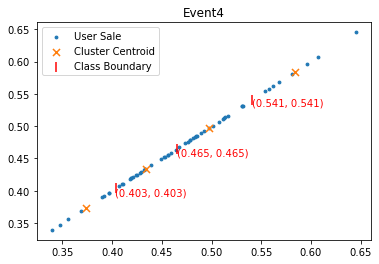

In [12]:
# 画图
fig, ax1 = plt.subplots(1)

ax1.scatter(X[0:],X[0:]
           ,marker = 'o'#点的形状
           ,s = 8#点的大小
           )
ax1.scatter(centroid, centroid
           ,marker = 'x'#点的形状
           ,s = 50#点的大小
           )
ax1.scatter(boundary, boundary
           ,marker = '|'#点的形状
           ,s = 100#点的大小
            ,color='r'
           )
ax1.legend(['User Sale', 'Cluster Centroid', 'Class Boundary'])
ax1.set_title('Event' + str(EVENT_NUM))
# 给质心打标签
# for i in range(4):
#     num = np.around(centroid[i], 2)
#     plt.text(num, num, (num, num))
# 给类别打标签
for i in range(3):
    num = np.around(boundary[i], 3)
    plt.text(num, num - 0.01, (num, num), color='r')
# plt.show()
plt.savefig(ROOT_PATH + 'Dataset/imgs/cluster_event_' + str(EVENT_NUM))

In [13]:
centroid[:]

array([0.37328203, 0.43359421, 0.49713753, 0.58392792])

In [14]:
boundary

[0.4034381154790946, 0.46536586674018793, 0.5405327247028169]